<a href="https://colab.research.google.com/github/tengkumuazabs/my-portfolio/blob/main/python-projects/Predict_prices_of_airline_tickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
!gdown 1iM3R-scV15jQ81zfJrE2tNUDXneosfTX

Downloading...
From: https://drive.google.com/uc?id=1iM3R-scV15jQ81zfJrE2tNUDXneosfTX
To: /content/Data_Train.xlsx
100% 530k/530k [00:00<00:00, 92.0MB/s]


In [ ]:
train_data=pd.read_excel('Data_Train.xlsx')

<Axes: >

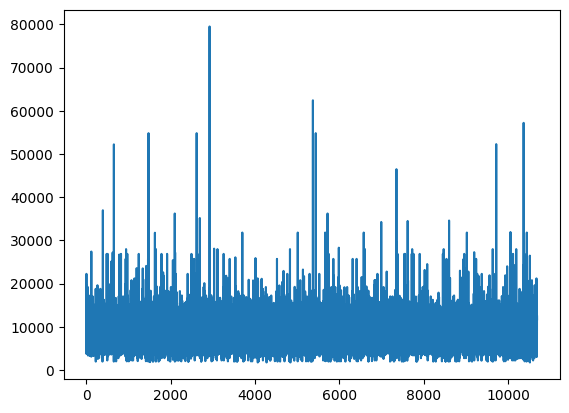

In [ ]:
train_data.Price.plot()

In [ ]:
train_data.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
# import dataset

- since the data is from excel file we hace to use pandas read_excel instad of read_csv
- after loading the data it is  important to check null values in a column or a row
- if it is present then following can be done,
  filling the nan values with mean, median, or mode using fillna method
  id less missing values we can drop the data as well

In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data.shape

(10683, 11)

In [ ]:
train_data[train_data.Total_Stops.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# preprocessing and perform featurization of date_of_journey

In [ ]:
data=train_data.copy()

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
def change_into_date(col):
  data[col]=pd.to_datetime(data[col])

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
  change_into_date(feature)

<ipython-input-142-b7201bcc47c9>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
data.Date_of_Journey.min()

Timestamp('2019-01-03 00:00:00')

In [ ]:
data.Date_of_Journey.max()

Timestamp('2019-12-06 00:00:00')

this data belongs to 2019 only, so extracting the year feature makes no sense

In [ ]:
# do feature engineering of Date_of_Journey adn fetch the day, month, and year

In [ ]:
data.Date_of_Journey.dt.day

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: Date_of_Journey, Length: 10682, dtype: int64

In [ ]:
data['journey_day']=data.Date_of_Journey.dt.day

In [ ]:
data['journey_month']=data.Date_of_Journey.dt.month

In [ ]:
data['journey_year']=data.Date_of_Journey.dt.year

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-14 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-14 05:50:00,2023-11-14 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [ ]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-11-14 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-14 05:50:00,2023-11-14 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-14 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-11-14 18:05:00,2023-11-14 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-11-14 16:50:00,2023-11-14 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [ ]:
# clean Dep_Time and Arrival_Time and featurize it

In [ ]:
def extract_hour_min(df,col):
  df[col+'_hour']=df[col].dt.hour
  df[col+'_min']=df[col].dt.minute
  df.drop(col,axis=1,inplace=True)
  return df.head(2)

In [ ]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-14 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [ ]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [ ]:
# analyse when will most of the flights will take off

In [ ]:
def flight_dep_time(x):
  if x>4 and x<=8:
    return 'early morning'
  elif x>8 and x<=12:
    return 'morning'
  elif x>12 and x<=16:
    return 'noon'
  elif x>16 and x<=20:
    return 'evening'
  elif x>20 and x<=24:
    return 'night'
  else:
    return 'late night'

<Axes: >

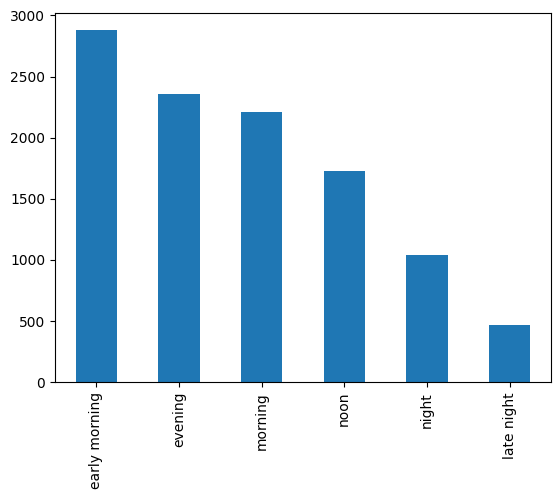

In [ ]:
data.Dep_Time_hour.apply(flight_dep_time).value_counts().plot(kind='bar')

<Axes: ylabel='Dep_Time_hour'>

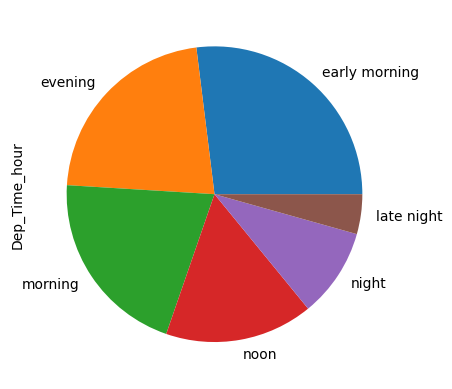

In [ ]:
data.Dep_Time_hour.apply(flight_dep_time).value_counts().plot(kind='pie')

In [ ]:
# use cufflinks and plotly to make the visuals even more interactive

In [ ]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [ ]:
cf.go_offline()

<Axes: >

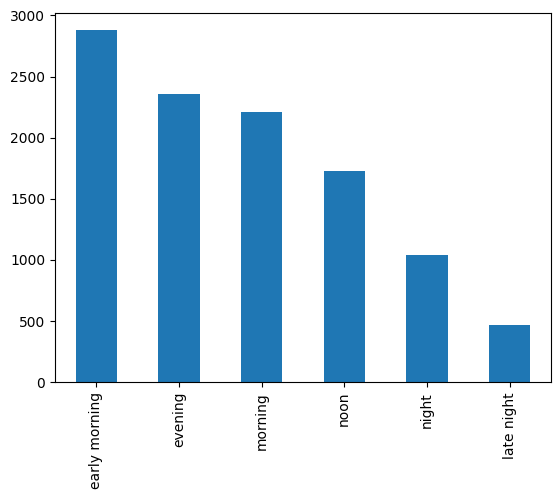

In [ ]:
data.Dep_Time_hour.apply(flight_dep_time).value_counts().plot(kind='bar')

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [ ]:
# preprocess duration feature and extract meaningful features

In [ ]:
def preprocess_duration(x):
  if 'h' not in x:
    x='0h '+x
  elif 'm' not in x:
    x=x+' 0m'
  return x

In [ ]:
data.Duration=data.Duration.apply(preprocess_duration)

In [ ]:
data.Duration

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [ ]:
data.Duration[0].split(' ')[0]

'2h'

In [ ]:
int(data.Duration[0].split(' ')[0][0:-1])

2

In [ ]:
int(data.Duration[0].split(' ')[1][0:-1])

50

In [ ]:
lambda x:int(x.split(' ')[0][0:-1])

<function __main__.<lambda>(x)>

In [ ]:
data['Duration_hours']=data.Duration.apply(lambda x:int(x.split(' ')[0][0:-1]))

In [ ]:
data['Duration_mins']=data.Duration.apply(lambda x:int(x.split(' ')[1][0:-1]))

In [ ]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


In [ ]:
# analyse whehter duration impacts on price or not

In [ ]:
data.Duration.str.replace('h','*60')

0        2*60 50m
1        7*60 25m
2        19*60 0m
3        5*60 25m
4        4*60 45m
           ...   
10678    2*60 30m
10679    2*60 35m
10680     3*60 0m
10681    2*60 40m
10682    8*60 20m
Name: Duration, Length: 10682, dtype: object

In [ ]:
data.Duration.str.replace('h','*60').str.replace(' ','+').str.replace('m','*1')

0        2*60+50*1
1        7*60+25*1
2        19*60+0*1
3        5*60+25*1
4        4*60+45*1
           ...    
10678    2*60+30*1
10679    2*60+35*1
10680     3*60+0*1
10681    2*60+40*1
10682    8*60+20*1
Name: Duration, Length: 10682, dtype: object

In [ ]:
data.Duration.str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [ ]:
data['Duration_total_mins']=data.Duration.str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


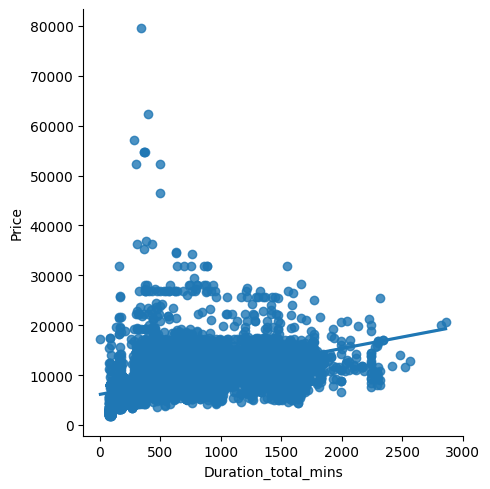

In [ ]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

as the duration of minute increases, the price also increases

In [ ]:
# which city has the maximum of final destination flights

In [ ]:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<Axes: ylabel='Destination'>

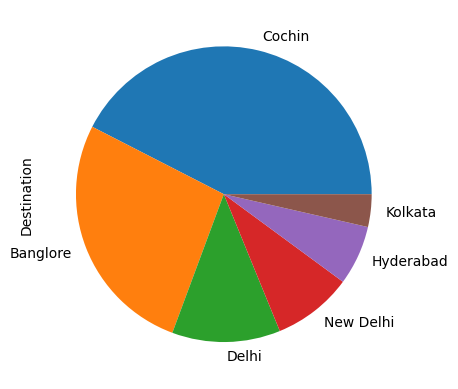

In [ ]:
data.Destination.value_counts().plot(kind='pie')

Delhi labels need to be corrected

In [ ]:
# perform exploratory data analysis or bivariate analysis to come up with some business insights

In [ ]:
# find the most route taken by jet airways

In [ ]:
data.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [ ]:
data[data.Airline=='Jet Airways'].groupby('Route').size()

Route
BLR → BDQ → DEL            8
BLR → BOM → DEL          385
BLR → BOM → JDH → DEL      3
BLR → DEL                382
BLR → MAA → DEL           10
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → DEL → HYD            5
BOM → HYD                207
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
CCU → BOM → BLR          930
CCU → BOM → PNQ → BLR      4
CCU → DEL → BLR          300
CCU → GAU → BLR           22
DEL → AMD → BOM → COK    141
DEL → ATQ → BOM → COK     38
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → BOM → COK          875
DEL → CCU → BOM → COK      1
DEL → COK                 34
DEL → DED → BOM → COK      2
DEL → IDR → BOM → COK     86
DEL → IXC → BOM → COK     13
DEL → JAI → BOM → COK    207
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → MAA → BOM → COK     16
DEL → NAG → BOM → COK     61
DEL → UDR → BOM → COK      7
dtype: int64

In [ ]:
data[data.Airline=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [ ]:
# airline vs price analysis

In [ ]:
# find the price distribution and 5 point summary of each airline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

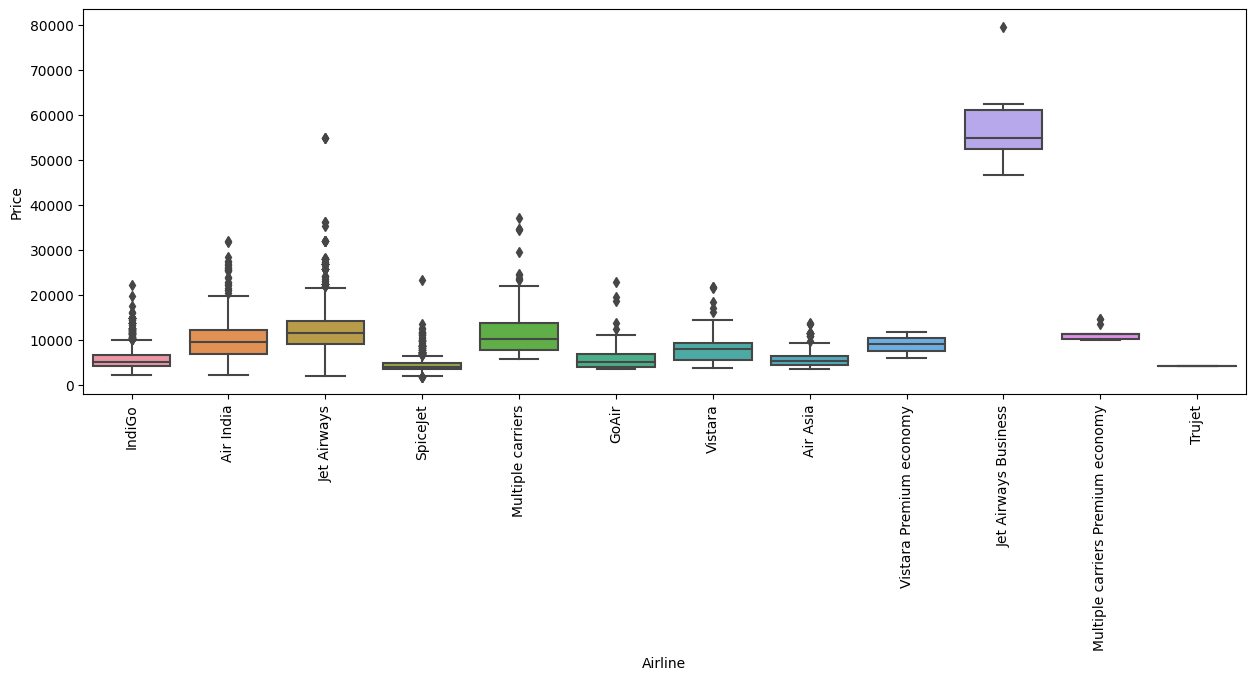

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

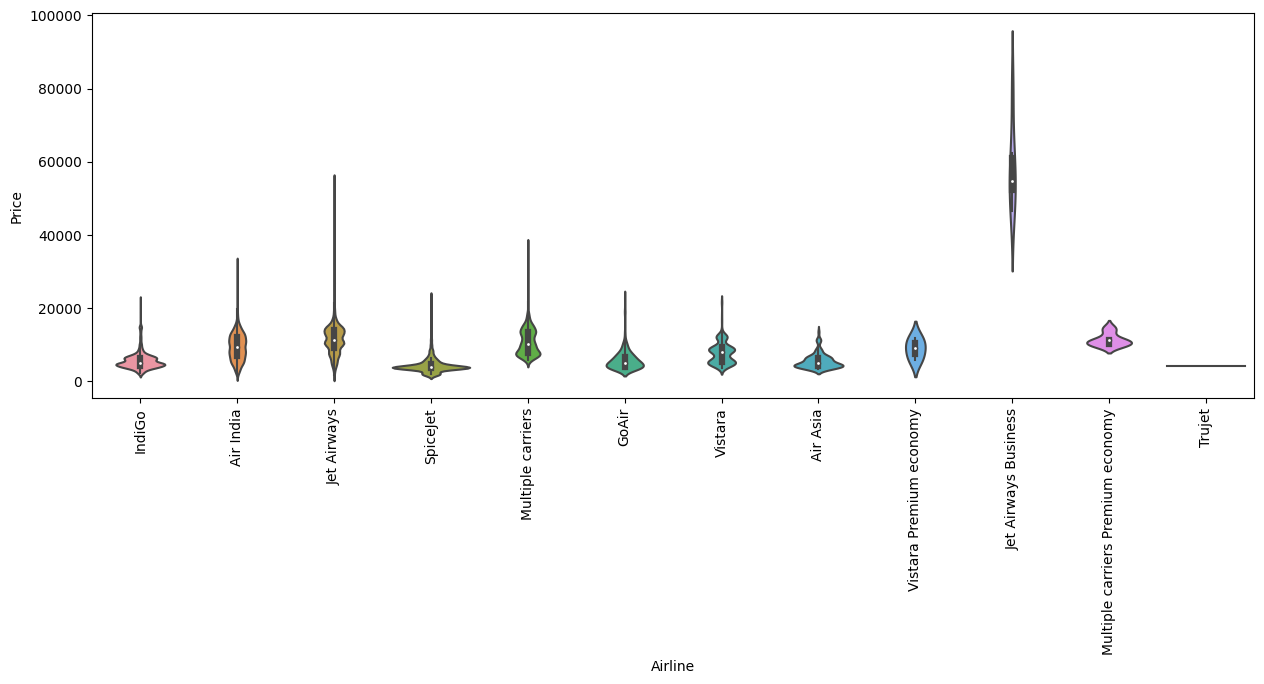

In [ ]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

In [ ]:
# perform feature encoding on the data

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


In [ ]:
np.round(data.Additional_Info.value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

additional info contains 78 percent of no info so we can drop it

In [ ]:
data.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [ ]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45


In [ ]:
# separate categorical data and numerical data

In [ ]:
[col for col in data.columns if data[col].dtype=='object']

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [ ]:
[col for col in data.columns if data[col].dtype!='object']

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_hours',
 'Duration_mins']

In [ ]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [ ]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [ ]:
# handling categorical data

nominal data, then use onehotencoder
ordinal data, then use labelencoder

In [ ]:
data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
data.Source

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [ ]:
data.Source.apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [ ]:
for category in data.Source.unique():
  data['Source_'+category]=data.Source.apply(lambda x: 1 if x==category else 0)

In [ ]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [ ]:
# perform target guided mean encoding

In [ ]:
data.groupby('Airline').Price.mean().sort_values().index

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [ ]:
airlines=data.groupby('Airline').Price.mean().sort_values().index

In [ ]:
{key:index for index,key in enumerate(airlines,0)}

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [ ]:
data.Airline=data.Airline.map(dict1)

In [ ]:
data.Airline

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [ ]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [ ]:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
data.Destination.replace('New Delhi','Delhi',inplace=True)

In [ ]:
data.groupby('Destination').Price.mean().sort_values().index

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [ ]:
dest=data.groupby('Destination').Price.mean().sort_values().index

In [ ]:
dict2={key:index for index, key in enumerate(dest,0)}

In [ ]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [ ]:
data.Destination=data.Destination.map(dict2)

In [ ]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [ ]:
# perform manual encoding on total_stops feature

In [ ]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
{'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

In [ ]:
stops={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [ ]:
data.Total_Stops=data.Total_Stops.map(stops)

In [ ]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [ ]:
# perform outlier detection

list of data visualization plots to spot the outliers:
- box adn whisker plot or boxplot
- scatter plot
- histogram
- distrbution plot
- qq plot

In [ ]:
def plot(df,col):
  fig,(ax1,ax2,ax3)=plt.subplots(3,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2,orient='h')
  sns.distplot(df[col],ax=ax3,kde=False)

<ipython-input-239-a511660c525a>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-239-a511660c525a>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




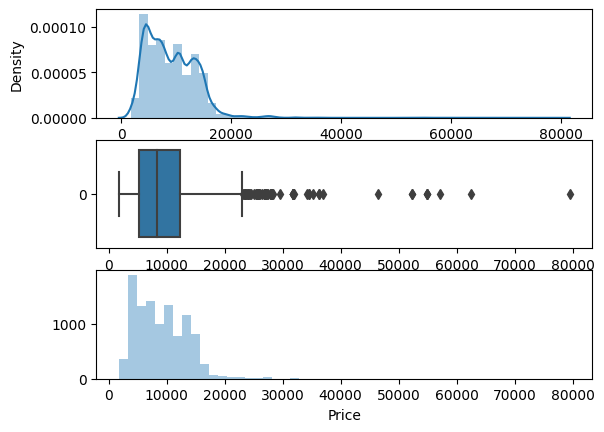

In [ ]:
plot(data,'Price')

In [ ]:
# getting a high level overview of various ways to deal with outliers

In [ ]:
np.where(data.Price>=35000,data.Price.median(),data.Price)

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

In [ ]:
data.Price=np.where(data.Price>=35000,data.Price.median(),data.Price)

<ipython-input-239-a511660c525a>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-239-a511660c525a>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




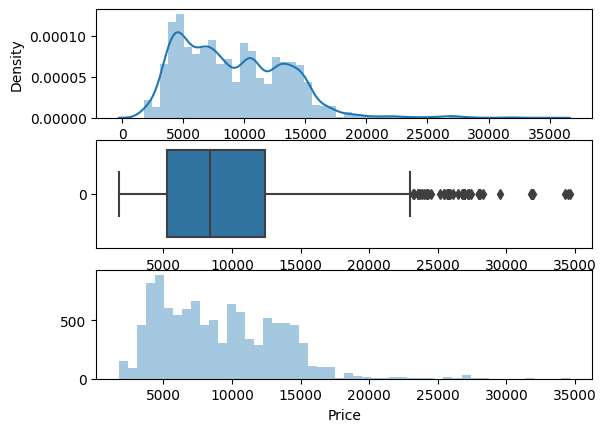

In [ ]:
plot(data,'Price')

In [ ]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,8372.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,8372.0,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,8372.0,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,8372.0,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,8372.0,3,1,16,50,21,35,4,45,1,0,0,0,0


In [ ]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [ ]:
data.head()

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302.0,3,1,16,50,21,35,4,45,1,0,0,0,0


In [ ]:
data.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Price                float64
journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_min           int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
Duration_hours         int64
Duration_mins          int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [ ]:
# performing feature selection

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
x=data.drop('Price',axis=1)

In [ ]:
y=data.Price

In [ ]:
x.dtypes

Airline              int64
Destination          int64
Total_Stops          int64
journey_day          int64
journey_month        int64
Dep_Time_hour        int64
Dep_Time_min         int64
Arrival_Time_hour    int64
Arrival_Time_min     int64
Duration_hours       int64
Duration_mins        int64
Source_Banglore      int64
Source_Kolkata       int64
Source_Delhi         int64
Source_Chennai       int64
Source_Mumbai        int64
dtype: object

In [ ]:
mutual_info_regression(x,y)

array([0.986287  , 0.99625689, 0.79560283, 0.20311819, 0.24099413,
       0.34845387, 0.255978  , 0.40745232, 0.34705059, 0.47500422,
       0.34813657, 0.39304844, 0.45877498, 0.51345707, 0.13405456,
       0.20391759])

In [ ]:
pd.DataFrame(mutual_info_regression(x,y),index=x.columns)

,0
Airline,0.978491
Destination,1.000393
Total_Stops,0.788278
journey_day,0.195875
journey_month,0.231574
Dep_Time_hour,0.338569
Dep_Time_min,0.262627
Arrival_Time_hour,0.408999
Arrival_Time_min,0.350454
Duration_hours,0.460696


In [ ]:
imp=pd.DataFrame(mutual_info_regression(x,y),index=x.columns)
imp.columns=['importance']

In [ ]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,0.997198
Airline,0.978789
Total_Stops,0.798419
Source_Delhi,0.520189
Duration_hours,0.471143
Source_Kolkata,0.461980
Source_Banglore,0.394135
Arrival_Time_hour,0.393868
Duration_mins,0.342478
Arrival_Time_min,0.340701


In [ ]:
# build ml model, then save it

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
ml_model=RandomForestRegressor()

In [ ]:
model=ml_model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([16732.83,  6336.42,  8858.92, ...,  3543.79,  6172.58,  7004.46])

In [ ]:
y_pred.shape

(2671,)

In [ ]:
len(x_test)

2671

In [ ]:
# save ml model

In [ ]:
import pickle

In [ ]:
file=open('/content/rf_random.pkl','wb')

In [ ]:
pickle.dump(model,file)

In [ ]:
model=open('/content/rf_random.pkl','rb')

In [ ]:
forest=pickle.load(model)

In [ ]:
forest.predict(x_test)

array([16732.83,  6336.42,  8858.92, ...,  3543.79,  6172.58,  7004.46])

In [ ]:
# defining own evaluation metrics

In [ ]:
def mape(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)

  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
mape(y_test,forest.predict(x_test))

13.255212709333957

In [ ]:
# automate ml pipeline

In [ ]:
def predict(ml_model):
  model=ml_model.fit(x_train,y_train)
  print('training score: {}'.format(model.score(x_train,y_train)))

  y_pred=model.predict(x_test)
  print('prediction result: {} \n'.format(y_pred))

  from sklearn import metrics
  r2_score=metrics.r2_score(y_test,y_pred)
  print('r2_score: {}'.format(r2_score))

  print('mse: ',metrics.mean_squared_error(y_test,y_pred))
  print('mae: ',metrics.mean_absolute_error(y_test,y_pred))
  print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
  print('mape: ',mape(y_test,y_pred))

  sns.distplot(y_test-y_pred)

training score: 0.9515448551591623
prediction result: [16720.79  6248.32  8658.76 ...  3510.04  6484.65  7018.21] 

r2_score: 0.809642274782947
mse:  3705807.987747543
mae:  1182.3049817914937
rmse:  1925.0475286983287
mape:  13.246495772831068


<ipython-input-291-fd1e720b676f>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




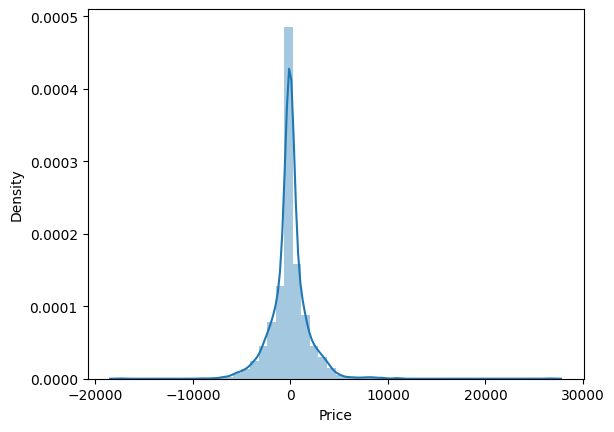

In [ ]:
predict(RandomForestRegressor())

In [ ]:
# hypertune the model

hyperparemetere tuning
- choose following method for hyperparameter tuning
  a. randomized search cv 0 - fast way to hypertune model
  b. grid search cv - slow way to hypertune the model
- choose ml algorithms that will be use for hyperparameter
- assign hyperparameters in form of dictionary or create hyperparameter space
- define searching and apply searching on training data or fit the cv model
- check best parameters and best score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
reg_rf=RandomForestRegressor()

In [ ]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [ ]:
[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

[1000, 1040, 1080, 1120, 1160, 1200]

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

In [ ]:
max_features=['auto','sqrt']

In [ ]:
[int(x) for x in np.linspace(start=5,stop=30,num=4)]

[5, 13, 21, 30]

In [ ]:
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

In [ ]:
min_samples_split=[5,10,15,100]

In [ ]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [ ]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [ ]:
rf_random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [ ]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [ ]:
pred2=rf_random.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.r2_score(y_test,pred2)

0.8302323217186715